# TCC - Detecção de Apneia do sono com sinais EEG

In [1]:
# imports
import pyedflib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime

## Explorando DB #1 

### Lendo base e definindo funções auxiliares

Nota: Para cada segundo do experimento de um paciente, existem 128 amostras do sinal.

In [2]:
project_folder_path = '/home/samantha.athayde/Documents/tcc/base1/st-vincents-university-hospital-university-college-dublin-sleep-apnea-database-1.0.0/files/'
project_folder_path

'/home/samantha.athayde/Documents/tcc/base1/st-vincents-university-hospital-university-college-dublin-sleep-apnea-database-1.0.0/files/'

In [3]:
# no contexto do database, só temos 2 canais eeg, C3 e C4
def read_eeg_signals(patient_rec_path, signals):
    patient_rec_file = pyedflib.EdfReader(patient_rec_path)

    file_signal_labels = patient_rec_file.getSignalLabels()

    print("=========================================================================")
    print("Signals in file: ")
    print(file_signal_labels)
    print(f"Recording duration: {patient_rec_file.getFileDuration() / (60 * 60)} H")

    print("\n=========================================================================")
    print(f"Signals of interest: {signals}")

    sigbufs = np.zeros((len(signals), patient_rec_file.getNSamples()[3]))
    print(f"EEG signals dataset shape: {sigbufs.shape}")

    sigbufs[0, :] = patient_rec_file.readSignal(3) # C3A2
    sigbufs[1, :] = patient_rec_file.readSignal(4) # C4A1

    patient_rec_file.close()

    return sigbufs


In [4]:
def beautify_time(seconds):
    return str(datetime.timedelta(seconds=seconds))

In [5]:
patient_ucddb002_file_name = '/home/samantha.athayde/Documents/tcc/base1/st-vincents-university-hospital-university-college-dublin-sleep-apnea-database-1.0.0/files/ucddb002.rec'
patient_ucddb002_file_name

'/home/samantha.athayde/Documents/tcc/base1/st-vincents-university-hospital-university-college-dublin-sleep-apnea-database-1.0.0/files/ucddb002.rec'

In [6]:
patient_ucddb002_eeg_signals = read_eeg_signals(patient_ucddb002_file_name, ['C3A2', 'C4A1'])
patient_ucddb002_eeg_signals

Signals in file: 
['Lefteye', 'RightEye', 'EMG', 'C3A2', 'C4A1', 'ECG', 'SpO2', 'Sound', 'Flow', 'Sum', 'ribcage', 'abdo', 'BodyPos', 'Pulse']
Recording duration: 6.241666666666666 H

Signals of interest: ['C3A2', 'C4A1']
EEG signals dataset shape: (2, 2876160)


array([[0.51184371, 0.43565324, 0.35946276, ..., 0.3047619 , 0.24615385,
        0.43956044],
       [0.61147741, 0.55091575, 0.32429792, ..., 0.55482295, 0.56068376,
        0.55873016]])

In [7]:
def plot_event(event_name, start_time, duration, channel):
    time_hms = start_time.split(':')
    start_second = int(time_hms[0])*60*60 + (int(time_hms[1])*60) + int(time_hms[2])
    
    event_start = start_second * 128
    event_end = event_start + (128*duration)
    
    x = np.arange(event_start, event_end)
    y = channel[event_start:event_end]
    
    plt.figure(figsize=(8, 6),)
    plt.plot(x, y)
    plt.title(event_name)
    
    plt.xlabel('Sample')
    plt.ylabel('Signal')
    
    print(y.shape, x.shape)
  

(1920,) (1920,)


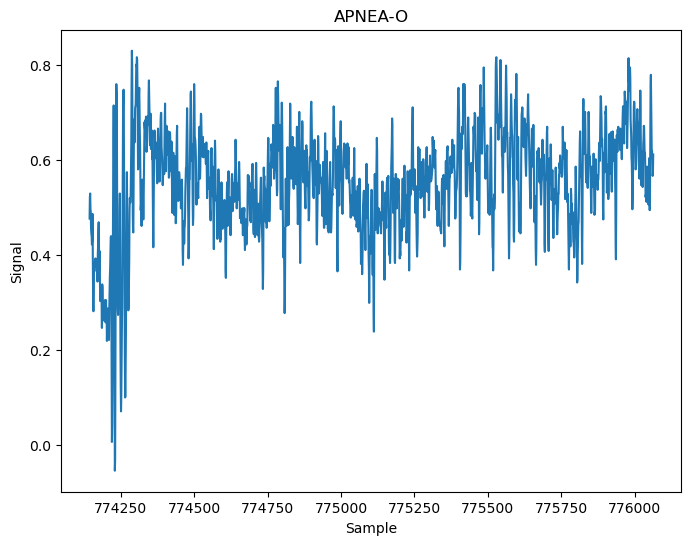

In [8]:
plot_event("APNEA-O", "01:40:48", 15, patient_ucddb002_eeg_signals[0]) # C3A2

(2176,) (2176,)


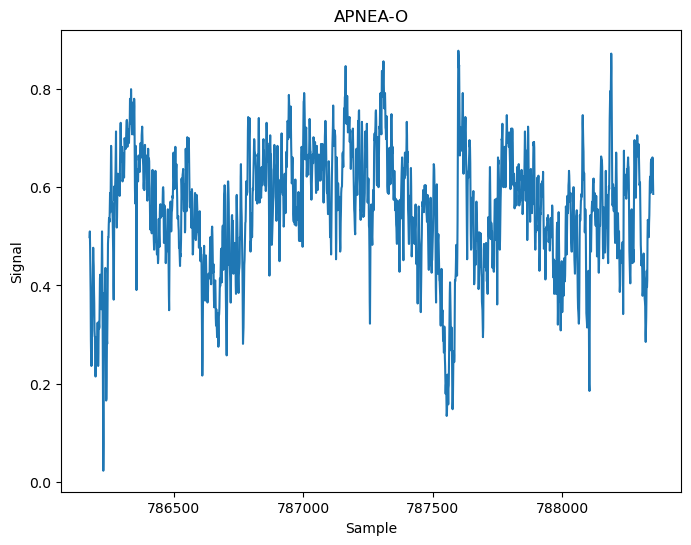

In [9]:
plot_event("APNEA-O", "01:42:22", 17, patient_ucddb002_eeg_signals[0])

### Lendo informações sobre os pacientes

In [10]:
patients_raw = pd.read_excel('./st-vincents-university-hospital-university-college-dublin-sleep-apnea-database-1.0.0/files/SubjectDetails.xls')

In [11]:
patients = patients_raw.loc[:, ~patients_raw.columns.str.contains('^Unnamed')]
patients

,S/No,Study Number,Height (cm),Weight (kg),Gender,PSG Start Time,PSG AHI,BMI,Age,Epworth Sleepiness Score,Study Duration (hr),Sleep Efficiency (%),No of data blocks in EDF
0,1,UCDDB002,172,100.3,M,0:11:04,23,33.9,54,16,6.2,84,22470
1,2,UCDDB003,179,102.0,M,23:07:50,51,31.8,48,13,7.3,81,26478
2,3,UCDDB005,176,100.4,M,23:28:42,13,32.4,65,19,6.9,63,24798
3,4,UCDDB006,185,103.5,M,23:57:14,31,30.2,52,3,6.7,89,24267
4,5,UCDDB007,183,84.0,M,23:30:22,12,25.1,47,15,6.8,90,24405
5,6,UCDDB008,145,59.8,F,23:29:11,5,28.4,63,1,6.4,64,23041
6,7,UCDDB009,180,101.5,M,22:35:22,12,31.3,52,19,7.7,80,27759
7,8,UCDDB010,174,119.0,M,22:51:18,34,39.3,38,2,7.6,92,27211
8,9,UCDDB011,188,101.0,M,22:47:38,8,28.6,51,8,7.5,60,27030
9,10,UCDDB012,179,97.5,M,23:23:21,25,30.4,51,16,7.2,85,25941


In [12]:
number_of_patients = len(patients)
number_of_patients

25

### Lendo anotações dos eventos respiratorios

A ideia é ler as anotações dos eventos respiratorios de cada paciente, transforma-las em um dataframe que depois é adicionado em uma lista contendo as anotações de todos os pacientes.

In [13]:
patients_notes_list = []

In [14]:
patients_notes_path = './st-vincents-university-hospital-university-college-dublin-sleep-apnea-database-1.0.0/files/'

In [15]:
def read_annotations(notes_path):
    # pegando apenas as colunas necessárias
    notes_df_raw = pd.read_fwf(notes_path, skiprows=2)
    notes_df = notes_df_raw[['Time', 'Type', 'Duration']]
    
    # removendo linhas com valores nulos
    notes_df_clean = notes_df.dropna()
    
    return notes_df_clean

In [16]:
for patient in range(number_of_patients):
    patient_notes_path = patients_notes_path + patients['Study Number'][patient].lower() + '_respevt.txt'
    
    patient_notes = read_annotations(patient_notes_path)
    patients_notes_list.append(patient_notes)

In [17]:
patients_notes_list[0] # anotações do primeiro paciente

,Time,Type,Duration
0,00:29:13,HYP-C,16.0
1,00:59:46,HYP-C,20.0
2,01:01:37,HYP-C,13.0
3,01:02:25,HYP-C,13.0
4,01:07:47,HYP-C,14.0
...,...,...,...
119,05:01:26,HYP-C,21.0
120,05:02:09,HYP-C,31.0
121,05:03:03,HYP-C,19.0
122,05:05:03,APNEA-M,12.0


### Criando o dataset que será utilizado na CNN

Cada sinal de cada experimento será divido em frames de comprimento pré-definido e também com um shift pré-definido para permitir overlap e aumentar a quantidade de dados para treino.

A classificação de cada frame será o equivalente a classificação do ponto médio (do dataframe), ou seja, se o ponto médio estiver dentro de um evento de APNEA-C, essa será a classificação do frame.

**Classificações:**
- HYP-C (Hypopnea)
- HYP-O
- HYP-M
- APNEA-C (Central)
- APNEA-O (Obstructive)
- APNEA-M (Mixed)

**Legenda:**
- HYP -> Hypopnea
- C   -> Central
- O   -> Obstructive
- M   -> Mixed


In [18]:
# se generalized_apnea for True, o dataset desconsidera as ramificações da apneia (O, C e M)
generalized_apnea = True
classify_hyp = False

frame_length = 10 # medido em segundos
frame_shift = 8 # também medido em segundos, SAMPLE_RATE_FREQUENCY % frame_shift == 0
SAMPLE_RATE_FREQUENCY = 128

In [19]:
SAMPLE_RATE_FREQUENCY % 8

0

In [20]:
def classify_frame(patient_notes, frame_start_second):
    middle_point_seconds = frame_start_second + (frame_length / 2)
    middle_point_time = beautify_time(middle_point_seconds)




    pass

In [21]:
def frame_signal(patient):
    
    # getting patient recording
    patient_rec_path = project_folder_path + patient.lower() + '.rec'
    patient_rec = read_eeg_signals(patient_rec_path, ['C3A2', 'C4A1'])

    c3a2 = patient_rec[0]
    c3a2_ds = []

    c3a2_length = len(c3a2)

    print(c3a2_length)
    for i in range(0, c3a2_length, frame_shift * 128):
        c3a2_ds.append(c3a2[i : i+frame_length])

    print(len(c3a2_ds))

    
    # TODO: get whole signal
    
    # TODO: slice in frames


In [22]:
frame_signal("UCDDB002")

Signals in file: 
['Lefteye', 'RightEye', 'EMG', 'C3A2', 'C4A1', 'ECG', 'SpO2', 'Sound', 'Flow', 'Sum', 'ribcage', 'abdo', 'BodyPos', 'Pulse']
Recording duration: 6.241666666666666 H

Signals of interest: ['C3A2', 'C4A1']
EEG signals dataset shape: (2, 2876160)
2876160
2809


In [23]:
2876160 / 128 / 10

2247.0

## Explorando DB #2